# Evaluate the MNIST model by loading the weights

This is an example to demonstrate how we can perform predictions by loading a trained model

In [1]:
import warnings
warnings.filterwarnings("ignore", message = "numpy.dtype size changed")

import tensorflow as tf
from zoo import init_nncontext
from zoo.pipeline.api.net import TFDataset, TFPredictor
import numpy as np
import sys
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

from bigdl.dataset import mnist
from bigdl.dataset.transformer import *

import mnist_utilities_workshop

/usr/lib64/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Define the model

In [2]:
# Define the model

## Load the pretrained model

In [3]:
# load the weights

## Build the predictor

In [4]:
sc = init_nncontext()

(images_data, labels_data) = mnist_utilities_workshop.ws_read_data_sets("/opt/work/ODSC-east-2019/datasets/mnist/", "test")
image_rdd = sc.parallelize(images_data[:100])
labels_rdd = sc.parallelize(labels_data[:100])
rdd = image_rdd.zip(labels_rdd).map(lambda rec_tuple: [normalizer(rec_tuple[0], mnist.TRAIN_MEAN, mnist.TRAIN_STD)])

dataset = 
predictor = 

('Extracting', '/home/bala/odsc/ODSC-east-2019/datasets/mnist/t10k-images-idx3-ubyte.gz')
('Extracting', '/home/bala/odsc/ODSC-east-2019/datasets/mnist/t10k-labels-idx1-ubyte.gz')
INFO:tensorflow:Froze 6 variables.
INFO:tensorflow:Converted 6 variables to const ops.
creating: createTFNet


## Predict

In [5]:
mnist_predict = # predict

accuracy = mnist_predict.zip(labels_rdd).map(lambda x: np.argmax(x[0]) == x[1]).mean()
print("predict accuracy is %s" % accuracy)

predict accuracy is 1.0


## Print a few predictions

Predicted Values are:
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6]


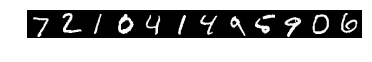

In [7]:
from bigdl.util import common

training_mean = 0.13066047740239506 * 255
training_std = 0.3081078 * 255
testing_mean = 0.13251460696903547 * 255
testing_std = 0.31048024 * 255
rdd_train_sample = image_rdd.zip(labels_rdd).map(lambda (features, label):
                                        common.Sample.from_ndarray(
                                        (features - testing_mean) / testing_std,
                                        label + 1))
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
imshow(np.column_stack([np.array(s.features[0].to_ndarray()).reshape(28,28) for s in rdd_train_sample.take(12)]),cmap='gray'); plt.axis('off')
print("Predicted Values are:")
print(map(lambda x: np.argmax(x),np.array(mnist_predict.collect()))[:12])

## Can you try....
1. Changing the number of Epochs
2. Changing the number of dense layers
3. How about activation function
